In [1]:
import pandas as pd
from pycaret.classification import *
from tqdm import tqdm

# 데이콘 점수

In [2]:
# 제출 점수(제출 날짜) : 0.6387738194(2021-12-19 01:09:14)

# 설정

In [3]:
# id, contents_open_dt 제거 : ⭕
# 모든 값이 1인 person_prefer_f, person_prefer_g 열 제거 : ⭕
# person_rn, contents_rn 제거 : ⭕
# 중복 샘플 제거 : ❌

In [4]:
# pycaret, tuned_nb
# combine
# 순서형 특성 수치형으로 지정 : ❌
    # 'person_attribute_a_a', 'person_attribute_b', 'person_prefer_e', 'contents_attribute_e'

# 데이터 불러오기

In [5]:
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

# 데이터 확인

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501951 entries, 0 to 501950
Data columns (total 35 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   id                      501951 non-null  int64 
 1   d_l_match_yn            501951 non-null  bool  
 2   d_m_match_yn            501951 non-null  bool  
 3   d_s_match_yn            501951 non-null  bool  
 4   h_l_match_yn            501951 non-null  bool  
 5   h_m_match_yn            501951 non-null  bool  
 6   h_s_match_yn            501951 non-null  bool  
 7   person_attribute_a      501951 non-null  int64 
 8   person_attribute_a_1    501951 non-null  int64 
 9   person_attribute_b      501951 non-null  int64 
 10  person_prefer_c         501951 non-null  int64 
 11  person_prefer_d_1       501951 non-null  int64 
 12  person_prefer_d_2       501951 non-null  int64 
 13  person_prefer_d_3       501951 non-null  int64 
 14  person_prefer_e         501951 non-n

In [7]:
train.head()

,id,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_f,person_prefer_g,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j_1,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,contents_open_dt,target
0,0,True,True,True,False,False,False,1,4,3,5,275,370,369,8,1,1,4,95,59,3,3,10,2,1,2,1608,275,1,4,139,618822,354805,2020-01-17 12:09:36,1
1,1,False,False,False,True,True,False,1,3,4,1,114,181,175,4,1,1,131,101,96,1,3,5,1,1,2,1608,275,1,4,133,571659,346213,2020-06-18 17:48:52,0
2,2,False,False,False,True,False,False,2,0,3,5,464,175,452,3,1,1,54,263,56,3,1,10,2,1,1,1600,94,1,4,53,399816,206408,2020-07-08 20:00:10,0
3,3,False,False,False,True,False,False,2,0,2,5,703,705,704,3,1,1,72,227,2,1,3,5,1,1,2,1608,275,5,3,74,827967,572323,2020-01-13 18:09:34,0
4,4,True,True,True,False,False,False,1,3,4,5,275,370,369,4,1,1,214,210,209,1,1,10,2,1,2,1608,275,1,4,74,831614,573899,2020-03-09 20:39:22,0


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46404 entries, 0 to 46403
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id                      46404 non-null  int64 
 1   d_l_match_yn            46404 non-null  bool  
 2   d_m_match_yn            46404 non-null  bool  
 3   d_s_match_yn            46404 non-null  bool  
 4   h_l_match_yn            46404 non-null  bool  
 5   h_m_match_yn            46404 non-null  bool  
 6   h_s_match_yn            46404 non-null  bool  
 7   person_attribute_a      46404 non-null  int64 
 8   person_attribute_a_1    46404 non-null  int64 
 9   person_attribute_b      46404 non-null  int64 
 10  person_prefer_c         46404 non-null  int64 
 11  person_prefer_d_1       46404 non-null  int64 
 12  person_prefer_d_2       46404 non-null  int64 
 13  person_prefer_d_3       46404 non-null  int64 
 14  person_prefer_e         46404 non-null  int64 
 15  pe

In [9]:
test.head()

,id,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_f,person_prefer_g,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j_1,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,contents_open_dt
0,0,True,False,False,True,True,True,1,1,2,1,857,851,1227,4,1,1,263,56,49,1,3,10,2,1,2,1147,839,1,5,263,393790,236865,2020-12-01 02:24:18
1,1,False,False,False,True,False,False,2,0,2,2,683,1086,662,2,1,1,258,263,49,1,3,5,1,1,2,1611,278,1,4,263,394058,236572,2020-12-17 05:42:53
2,2,True,False,False,True,True,True,2,3,2,1,514,790,1233,0,1,1,177,170,171,3,3,3,1,1,2,1817,490,3,4,177,1002061,704612,2020-12-10 23:33:41
3,3,True,False,False,True,True,True,1,2,2,5,114,181,175,4,1,1,177,170,171,3,3,5,1,1,2,101,150,5,3,177,1000813,704652,2020-12-03 19:44:55
4,4,True,False,False,True,False,False,1,6,4,5,1082,1078,1056,5,1,1,178,177,4,3,1,5,1,1,1,985,1097,1,4,177,111146,704413,2020-12-11 21:24:34


# 필요 데이터 추출

In [10]:
# person_rn :  사용자번호
# contents_rn :  컨텐츠번호
# contents_open_dt :  컨텐츠 열람 일시

## 훈련에 의미가 적은 열 제거

In [11]:
# id, contents_open_dt 제거 : ⭕
# 모든 값이 1인 'person_prefer_f', 'person_prefer_g' 열 제거 : ⭕
# 'person_rn', 'contents_rn' 제거 : ⭕
# 중복 샘플 제거 : ❌

In [12]:
train = train.drop(['id', 'contents_open_dt', 'person_prefer_f', 'person_prefer_g', 'person_rn', 'contents_rn'], axis=1)
test = test.drop(['id', 'contents_open_dt', 'person_prefer_f', 'person_prefer_g', 'person_rn', 'contents_rn'], axis=1)

In [13]:
# train = train.drop(['id', 'contents_open_dt', 'person_prefer_f', 'person_prefer_g', 'person_rn', 'contents_rn'], axis=1)
# test = test.drop(['id', 'contents_open_dt', 'person_prefer_f', 'person_prefer_g', 'person_rn', 'contents_rn'], axis=1)

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501951 entries, 0 to 501950
Data columns (total 29 columns):
 #   Column                  Non-Null Count   Dtype
---  ------                  --------------   -----
 0   d_l_match_yn            501951 non-null  bool 
 1   d_m_match_yn            501951 non-null  bool 
 2   d_s_match_yn            501951 non-null  bool 
 3   h_l_match_yn            501951 non-null  bool 
 4   h_m_match_yn            501951 non-null  bool 
 5   h_s_match_yn            501951 non-null  bool 
 6   person_attribute_a      501951 non-null  int64
 7   person_attribute_a_1    501951 non-null  int64
 8   person_attribute_b      501951 non-null  int64
 9   person_prefer_c         501951 non-null  int64
 10  person_prefer_d_1       501951 non-null  int64
 11  person_prefer_d_2       501951 non-null  int64
 12  person_prefer_d_3       501951 non-null  int64
 13  person_prefer_e         501951 non-null  int64
 14  person_prefer_h_1       501951 non-null  int64
 15  

## 카테고리형 특성 원핫인코딩시 컬럼 명 겹치는 문제 해결위해 특성명 변경

In [15]:
# # 카테고리형 특성 원핫인코딩시 컬럼 명 겹치는 문제 해결위해 특성명 변경
# train = train.rename(columns={'person_attribute_a_1':'person_attribute_a_a'})
# train.head()

In [16]:
# # 카테고리형 특성 원핫인코딩시 컬럼 명 겹치는 문제 해결위해 특성명 변경
# test = test.rename(columns={'person_attribute_a_1':'person_attribute_a_a'})
# test.head()

# 모델 학습/예측

In [17]:
# 순서형 특성 수치형으로 지정 : ❌
# 'person_attribute_a_a', 'person_attribute_b', 'person_prefer_e', 'contents_attribute_e'

In [18]:
ex = setup(train, target='target', n_jobs=3, session_id=0, verbose=False, silent=True, 
 fold=5, fold_shuffle=True, combine_rare_levels=True)

In [19]:
# compare_models(sort='F1')
# 33m 16s

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,0.5486,0.5872,0.8156,0.5315,0.6436,0.0976,0.1154,0.5920
catboost,CatBoost Classifier,0.6226,0.6717,0.6712,0.6114,0.6399,0.2452,0.2464,45.3200
lightgbm,Light Gradient Boosting Machine,0.6130,0.6591,0.6692,0.6013,0.6334,0.2261,0.2275,5.1500
rf,Random Forest Classifier,0.6120,0.6579,0.6203,0.6098,0.6150,0.2240,0.2240,53.8340
gbc,Gradient Boosting Classifier,0.5998,0.6414,0.6393,0.5922,0.6148,0.1997,0.2003,76.8640
ada,Ada Boost Classifier,0.5932,0.6319,0.6172,0.5886,0.6025,0.1864,0.1866,17.0360
ridge,Ridge Classifier,0.5879,0.0000,0.6043,0.5848,0.5944,0.1758,0.1759,0.5420
lda,Linear Discriminant Analysis,0.5879,0.6232,0.6043,0.5848,0.5944,0.1758,0.1759,6.5880
et,Extra Trees Classifier,0.5953,0.6340,0.5924,0.5955,0.5939,0.1906,0.1906,70.8500
lr,Logistic Regression,0.5865,0.6205,0.6002,0.5838,0.5919,0.1729,0.1730,33.4520


GaussianNB(priors=None, var_smoothing=1e-09)

In [19]:
model = create_model('nb')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5476,0.5864,0.8208,0.5306,0.6445,0.0956,0.1141
1,0.5464,0.5867,0.8148,0.5300,0.6422,0.0931,0.1104
2,0.5498,0.5875,0.8137,0.5323,0.6436,0.0998,0.1176
3,0.5520,0.5911,0.8112,0.5340,0.6441,0.1043,0.1220
4,0.5474,0.5844,0.8176,0.5306,0.6435,0.0952,0.1131
Mean,0.5486,0.5872,0.8156,0.5315,0.6436,0.0976,0.1154
SD,0.0020,0.0022,0.0033,0.0015,0.0008,0.0040,0.0040


In [23]:
tuned_model = tune_model(model, optimize='F1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5476,0.5864,0.8208,0.5306,0.6445,0.0956,0.1141
1,0.5464,0.5867,0.8148,0.5300,0.6422,0.0931,0.1104
2,0.5498,0.5875,0.8137,0.5323,0.6436,0.0998,0.1176
3,0.5520,0.5911,0.8112,0.5340,0.6441,0.1043,0.1220
4,0.5474,0.5844,0.8176,0.5306,0.6435,0.0952,0.1131
Mean,0.5486,0.5872,0.8156,0.5315,0.6436,0.0976,0.1154
SD,0.0020,0.0022,0.0033,0.0015,0.0008,0.0040,0.0040


In [24]:
pred = predict_model(tuned_model, test)

In [25]:
pred.head()

,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,...,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,Label,Score
0,True,False,False,True,True,True,1,1,2,1,...,2,1,2,1147,839,1,5,263,1,0.5885
1,False,False,False,True,False,False,2,0,2,2,...,1,1,2,1611,278,1,4,263,0,0.5270
2,True,False,False,True,True,True,2,3,2,1,...,1,1,2,1817,490,3,4,177,0,0.9982
3,True,False,False,True,True,True,1,2,2,5,...,1,1,2,101,150,5,3,177,1,0.9140
4,True,False,False,True,False,False,1,6,4,5,...,1,1,1,985,1097,1,4,177,0,0.7689


In [26]:
pred.iloc[:,-2:].head()

,Label,Score
0,1,0.5885
1,0,0.5270
2,0,0.9982
3,1,0.9140
4,0,0.7689


In [27]:
pred['Label'].value_counts()

1    34518
0    11886
Name: Label, dtype: int64

# 제출파일 생성

In [28]:
submission = pd.read_csv('../data/sample_submission.csv')
submission['target'] = pred['Label']

submission.to_csv('sub_ver1.1.csv', index=False)

# 모델 분석 그래프

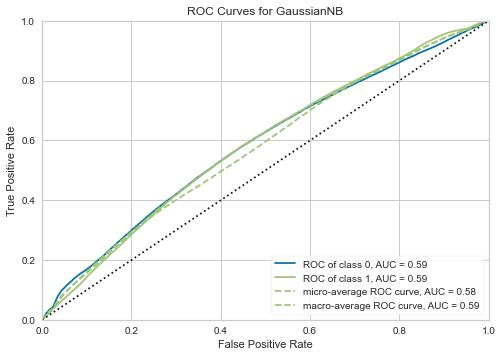

In [29]:
plot_model(model)